<a href="https://colab.research.google.com/github/BeccaYe/Assignments/blob/main/DataEngineering/CS5485Assignment1YeBichuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 - Data Acquisition
(20 marks) Social media content, including blogs, articles, news, and Twitter posts, provides valuable insights for
data science. Acquiring high-quality social media data is essential yet challenging. While crowdsourcing is an option,
it can be costly; thus, we prefer to collect data through web scraping.
Please collect 30 pieces of social media content from designated websites, ensuring that the data meets the
following criteria:
1. Include articles, blogs, news, or posts along with their comments.
2. Focus solely on the textual content.
3. Ensure the data is formatted in a structured way (e.g., JSON or CSV).
We provide some social media websites that you can take a try.
* https://english.news.cn
* https://www.bbc.com/news
* https://medium.com
* https://twitter.com

Please submit your code and the obtained social media data.


In [1]:
# Installing Libraries
! pip install requests
! pip install bs4

In [2]:
# Import Libraries
import requests as r
from bs4 import BeautifulSoup

# Find the Url of Target HTML
url1 = r'https://english.news.cn/20240923/7bdc9bef77ea4816b3cda838c44a815f/c.html'

# Obtain Html Framework and Contents
res1 = r.get(url1)
html1 = res1.text
# print(html1)

#  Reformat and Parse Html
bf1 = BeautifulSoup(html1)
# print(bf1.prettify())


In [3]:
# Extract source
source = bf1.find('p', class_='source').text.strip() if bf1.find('p', class_='source') else 'Source not found'
# Extract title
title = bf1.find('title').text.strip() if bf1.find('title') else 'Title not found'

# Extract editor
editor = bf1.find('p', class_='editor').text.strip() if bf1.find('p', class_='editor') else 'Editor not found'

# Extract time
time = bf1.find('p', class_='time').text.strip() if bf1.find('p', class_='time') else 'Time not found'

# Extract full text
full_text = ''
content = bf1.find('span', id='detailContent') if bf1.find('span', id='detailContent') else 'Full text not found'
paragraphs = content.find_all('p')
for p in paragraphs:
  full_text += p.text.strip()
full_text += '\n'
# Extract figure source
img_src = bf1.find('figure').find("img").get('src') if bf1.find('figure').find("img").get('src') else 'Image source not found'




# Extract figure caption
figure_caption = bf1.find('figure').find('figcaption').text.strip() if bf1.find('figcaption') else 'Figure Caption not found'

# Print the extracted information
print(f"Title: {title}")
print(f"Source: {source}")
print(f"Editor: {editor}")
print(f"Time: {time}")
print(f"Full Text: {full_text}")
print(f"Image Source: {img_src}")
print(f"Figure Caption: {figure_caption}")

Title: China sees rising urbanization rate over past 75 years-Xinhua
Source: Source: Xinhua
Editor: Editor: huaxia
Time: 2024-09-23 18:42:16
Full Text: BEIJING, Sept. 23 (Xinhua) -- China's urbanization rate, which measures the ratio of permanent urban residents relative to the total population, rose by 55.52 percentage points from the end of 1949 to 66.16 percent by the end of 2023, data from the National Bureau of Statistics (NBS) showed Monday.Over the past 75 years since the founding of the People's Republic of China, the country has undergone the largest and fastest urbanization process in world history, the NBS said in a report.There were just 129 cities in China at the end of 1949, with a combined population of 39.49 million. The number of cities reached 694 at the end of 2023, while prefecture-level and larger cities were home to 673.13 million people. Among them, there were 29 cities each with a population exceeding 5 million and 11 cities each with a population of over 10 mil

In [4]:
# Extract likes
like_list = bf1.find('div', class_='like') if bf1.find('div', class_='like') else 'Likes list not found'
likes = like_list.find_all('li')
like_link = []
like_title = []
for l in likes :
    like_link.append(l.find('h3').find('a', href=True)['href'])
    like_title.append(l.find('h3').find('a').text.strip())

print(f"Like link: {like_link}")
print(f"Like title: {like_title}")

Like link: ['https://english.news.cn/20240921/626dc0259be34675af7a67b1d7912634/c.html', 'https://english.news.cn/20240920/90f6eb49ad4c458eb669acc245b2ed11/c.html', 'https://english.news.cn/20240920/2b63d884396445329d247a828bc8dbc6/c.html', 'https://english.news.cn/20240919/eea956e21adc481cb4107ad2d3395436/c.html', 'https://english.news.cn/20240919/408aa11f51134c3297a38bdd7dc66301/c.html', 'https://english.news.cn/20240919/e99de54888074a68a01fbaadef2adc21/c.html']
Like title: ['SW China\'s Guizhou, the world\'s "Bridge Museum"', 'China launches new Tianqi constellation satellites', 'Convention in east China highlights smart manufacturing', "China's homegrown C919 aircraft arrives in Xizang for first time", 'China launches two BeiDou navigation satellites', "Huajiang Grand Canyon Bridge in southwest China's Guizhou completes setting of its main cables"]


In [9]:
# Find another Url
url2 = r'https://www.bbc.com/news/live/c748xq4lgzyt'

# Obtain Html Framework and Contents
res2 = r.get(url2)
html2 = res2.text
# print(html2)

#  Reformat and Parse Html
bf2 = BeautifulSoup(html2)
# print(bf2.prettify())


In [11]:
# Extract summary
summary = bf2.find('div', id='summaryPoints').text.strip() if bf2.find('div', id='summaryPoints') else 'Summary not found'

# Extract contributors
contributors = bf2.find('p', class_='ssrcss-1q0x1qg-Paragraph e1jhz7w10').text.strip() if bf2.find('p', class_='ssrcss-1q0x1qg-Paragraph e1jhz7w10') else 'Contributors not found'

# Extract viewer count
viewer_count = bf2.find('span', class_='ssrcss-15lohvb-CounterStringContainer e1naroyk0').text.strip() if bf2.find('span', class_='ssrcss-15lohvb-CounterStringContainer e1naroyk0') else 'Viewer count not found'

# Extract main heading
main_heading = bf2.find('h1', id='main-heading').text.strip() if bf2.find('h1', id='main-heading') else 'Main heading not found'


# Extract articles
article_list = bf2.find('ol', role='list') if bf2.find('ol', role='list') else 'Articles not found'
articles = article_list.find_all('article')
head = []
for a in articles :
    head.append(a.find('header').text.strip())



print(f"Summary: {summary}")
print(f"Contributors: {contributors}")
print(f"Articles head: {head}")
print(f"Viewer count: {viewer_count}")
print(f"Main Heading:{main_heading}")

Summary: SummaryPowerful explosions have struck southern Beirut as Israel carries out fresh strikes on a suburb with a strong Hezbollah presenceThe Israeli military says it hit weapons storage facilities belonging to Hezbollah setting off secondary explosionsThe attacks come after Israel issued new evacuation orders in southern LebanonEarlier, the Israeli military said it had killed Hezbollah commander Khader Ali Tawil - Hezbollah has not yet commented Flights have resumed at two airports in Tehran, after Iran earlier announced a mass cancellation of flights amid warnings from Israel it will retaliate for Iran's missile attackTomorrow Israel will mark a year on from the 7 October Hamas attacks, which saw gunmen storm into Israel killing about 1,200 people and taking 251 hostage
Contributors: Powerful explosions have struck southern Beirut as Israel carries out fresh strikes on a suburb with a strong Hezbollah presence
Articles head: ['The latest developments in Lebanon and Israelpublis

In [13]:
# save as a csv file
import csv
data = [
    ["Title", title],
    ["Source", source],
    ["Editor", editor],
    ["Time", time],
    ["Full Text", full_text],
    ["Image Source", img_src],
    ["Figure Caption", figure_caption],
    ["Viewer Count", viewer_count],
    ["Main Heading", main_heading]

]

# url1 likes info
# like link
for i, row in enumerate(like_link,start=1):
     data.append([f'LikeLink{i}' , row])
# like title
for i, row in enumerate(like_title, start=1):
     data.append([f'LikeTitle{i}' , row])


for i, row in enumerate(head,start=1):
     data.append([f'ArticleHead{i}' , row])

filename = "webData.csv"

with open(filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)

# Question 2 - Data Preprocessing
(30 marks) Regular Expressions, abbreviated as Regex or Regexp, are a string of characters created within the framework of Regex syntax rules. You can easily manage your data with Regex, which uses commands like finding, matching, and editing. Regex is an important tool during the data preprocessing stage.

We take some exercises about regular expressions in Python

In [16]:
# import 
import re
string = '192.268.0.1'

1. Write a pattern to check if a string contains only letters (both uppercase and lowercase).
- Test cases: Hello, world, 123abc



In [19]:
pattern1 = r'^[a-zA-Z]+$'

2. Write a pattern to find all words that start with a vowel.
- Test cases: apple, banana, orange, grape

In [22]:
pattern2 = r'^a|e|i|o|u'

3. Write a pattern to validate an email address.
- Test cases: test@example.com, invalid-email

In [197]:
pattern3 = r'[\w]+@[A-Za-z]+(\.[A-Za-z0-9]+){1,2}'

4. Write a pattern to extract all digits from a string.
- Test cases: The price is 100 dollars and 50 cents.

In [215]:
pattern4 = r'\d+'
re.findall(pattern4, string)

['123', '456']

 5. Write a pattern to match a URL.
- Test cases: https://www.example.com, ftp://example.com

In [235]:
pattern5 = r'^(https?|ftp|file)://[-A-Za-z0-9+&@#/%?=~_|!:,.;]+[-A-Za-z0-9+&@#/%=~_|]'

 6. Write a pattern to validate a US phone number format (e.g., (123) 456-7890)
- Test cases: (123) 456-7890, 123-456-789

In [273]:
pattern6 = r'^\(\d{3}\) \d{3}-\d{4}$'

7. Write a pattern to find a string that starts and ends with the same character.
- Test cases: radar, hello, level

In [281]:
pattern7 = r'^(.).*\1$|(^.{1}$)'

 8. Write a pattern to validate a complex password. The password must contain at least one uppercase letter, one
 lowercase letter, one digit, one special character, and be at least 8 characters long.
- Test cases: Password1!, PASSWORD,1!, Pass

In [347]:
pattern8 = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[!@#$%^&*()_+\-=\[\]{};\':"\\|,.<>\/?])[A-Za-z\d!@#$%^&*()_+\-=\[\]{};\':"\\|,.<>\/?]{8,}$'

9. Write a regex pattern to identify and extract all instances of dates in the format dd-mm-yyyy or yyyy/mm/dd
 from a given text. The pattern should handle both formats in a single regex.
- Test cases: I12-05-2023, 2023/06/15, and 01-01-2024.

In [330]:
pattern9 = r'^(\d{2}-\d{2}-\d{4}|(\d{4}/\d{2}/\d{2}))$'

 10. Create a regex pattern that matches a valid IPv4 address. The address must consist of four octets separated by
 dots, where each octet is a number between 0 and 255.
- Test cases: 192.168.0.1, 256.100.50.25, 172.16.254.1

In [359]:
pattern10 = r'^((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'

In [365]:
# validate
result = re.match(pattern10,string)
print(bool(result))

False


# Question 3 - Data Processing
 (20 marks) The source files of Workshop on Statistical Machine Translation (WMT) are usually xml files. Before we
 train a model using these data, we should convert them from XML formt to line-based text. Please solve the following
 questions:
 1. Please convert the data in this file 1 to the line-based text with your own Python codes. You need to remove all
 punctuation and convert all text to lowercase. You should submit your runnable codes and output file.


In [71]:
import xml.etree.ElementTree as ET
import string

# load and parse xml
tree = ET.parse('sample-hyp.xml')
root = tree.getroot()

# define a function that remove all punctuation from the text and convert it to lowercase.
def clean_text(text):
    
    # Remove punctuation
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    return cleaned_text


# store the en_corpus
file_en = "WMTsourceFile_en.txt"
# Open txt file for writing
with open(file_en, mode='w', newline='', encoding='utf-8') as file:
    # XML elements convert to lines
    for item in root.findall('doc'):
        segments_en = item.find('src').find('p')
        for seg_en in segments_en.findall('seg') :
            # write into the txt file
            file.write(f'{clean_text(seg_en.text)}\n')

# store the ha_corpus
file_ha = "WMTsourceFile_ha.txt"
# Open txt file for writing
with open(file_ha, mode='w', newline='', encoding='utf-8') as file:
    # XML elements convert to lines
    for item in root.findall('doc'):
        segments_ha = item.find('hyp').find('p')
        for seg_ha in segments_ha.findall('seg') :
            # write into the txt file
            file.write(f'{clean_text(seg_ha.text)}\n')



 2. After you obtain the line-based text file, please create a BPE vocabulary (save each BPE token line by line) with
 subword-nmt 2. You should submit your runnable codes and output file.

In [75]:
!pip install subword-nmt

In [101]:
! subword-nmt learn-bpe -s 3000 <WMTsourceFile_en.txt> bpe_codes_en.txt
! subword-nmt learn-bpe -s 3000 <WMTsourceFile_ha.txt> bpe_codes_ha.txt



100%|##########| 3000/3000 [00:02<00:00, 1434.73it/s]

100%|##########| 3000/3000 [00:01<00:00, 1777.96it/s]


In [99]:
# en
# Read the BPE codes and save them line by line
with open('bpe_codes_en.txt', 'r', encoding='utf-8') as f:
    bpe_tokens = f.readlines()

# Save each BPE token to a new file
with open('bpe_vocabulary_en.txt', 'w', encoding='utf-8') as vocab_file:
    for token in bpe_tokens:
        vocab_file.write(token.strip() + '\n')

# ha
# Read the BPE codes and save them line by line
with open('bpe_codes_ha.txt', 'r', encoding='utf-8') as f:
    bpe_tokens = f.readlines()

# Save each BPE token to a new file
with open('bpe_vocabulary_ha.txt', 'w', encoding='utf-8') as vocab_file:
    for token in bpe_tokens:
        vocab_file.write(token.strip() + '\n')

# Question 4- Data Visualization
 (30 marks) Data visualization is an effective method to overall evaluate the quality of the data. Generally, the conventional visualizations include column histogram/chart, pie chart, venn diagram, scatter plot, heatmap, etc.

 1. Assume we have a set of employee records containing employee ID (Integer; 1-500), department (Categorical; HR, IT, Sales), sex (Binary; Male/Female), and years of experience (Integer; 0-40), we intend to analyze these attributes by visualization. Which visualization technique should be selected for different attributes?

- department (Categorical; HR, IT, Sales)
  
  Bar chart.
  
- sex (Binary; Male/Female)
  
  Pie chart.
  
- years of experience (Integer; 0-40)
  
  Histogram.

 2. Write a Python Program to randomly generate 500 employee records based on the above descriptions and visualize the generated data using your selected techniques.

In [126]:
import pandas as pd
import numpy as np

# Constants
employee_num  = 500
departments = ['HR', 'IT', 'Sales']
sexs = ['Male', 'Female']

# Generate employee records
employee_ids = np.arange(1, employee_num + 1)
departments = np.random.choice(departments, employee_num)
sexs = np.random.choice(sexs, employee_num)
years_of_experience = np.random.randint(0, 41, employee_num)  # 0 to 40 years

# Create a DataFrame
employee_data = pd.DataFrame({
    'Employee ID': employee_ids,
    'Department': departments,
    'Sex': sexs,
    'Years of Experience': years_of_experience
})

print(employee_data)


     Employee ID Department     Sex  Years of Experience
0              1         HR    Male                   25
1              2      Sales  Female                   33
2              3         HR  Female                   22
3              4         HR  Female                   17
4              5         IT    Male                   12
..           ...        ...     ...                  ...
495          496         IT    Male                    4
496          497      Sales  Female                   34
497          498         IT    Male                   18
498          499         HR    Male                   23
499          500      Sales    Male                   11

[500 rows x 4 columns]


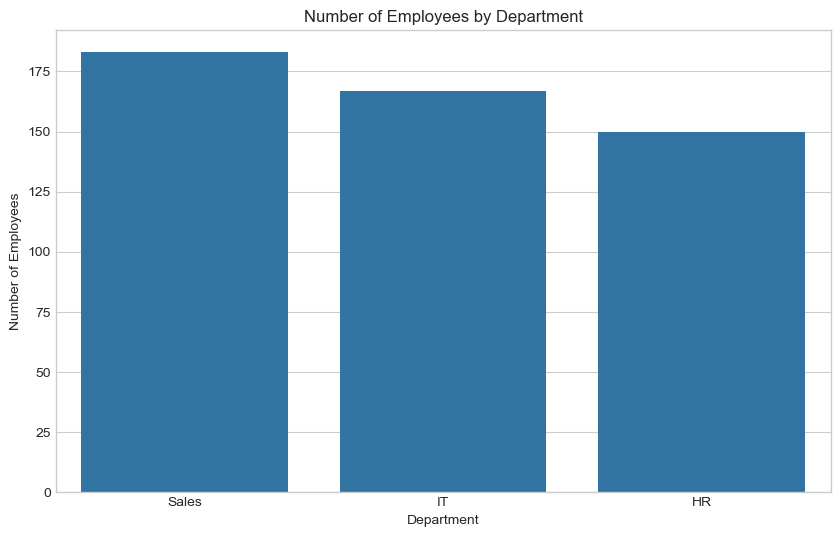

In [162]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the matplotlib figures to 'seaborn-whitegrid' for a clean look with grid lines
plt.style.use("seaborn-v0_8-whitegrid")

# Bar chart of department
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_data, x='Department', order=employee_data['Department'].value_counts().index)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()




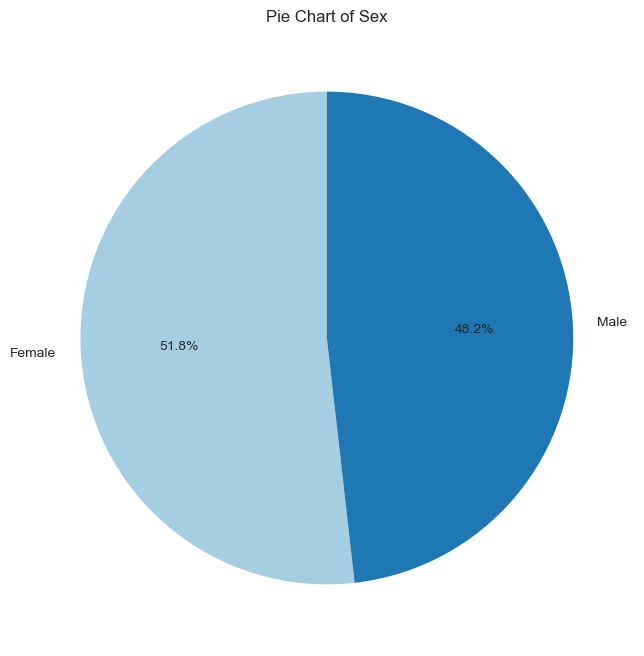

In [142]:
# Pie Chart of gender

# Group data by 'Sex' and count instances
sexData = employee_data.groupby('Sex').size()

# Make the plot with pandas
plt.figure(figsize=(8, 8))  # Set the size of the figure
# Create a pie chart
sexData.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.arange(len(sexData))))
# Note: 'autopct' automatically adds labels with the percentage format
plt.title("Pie Chart of Sex")  # Add a title
plt.ylabel("")  # Remove the y-label as it's not needed in pie charts

# Show the plot
plt.show()

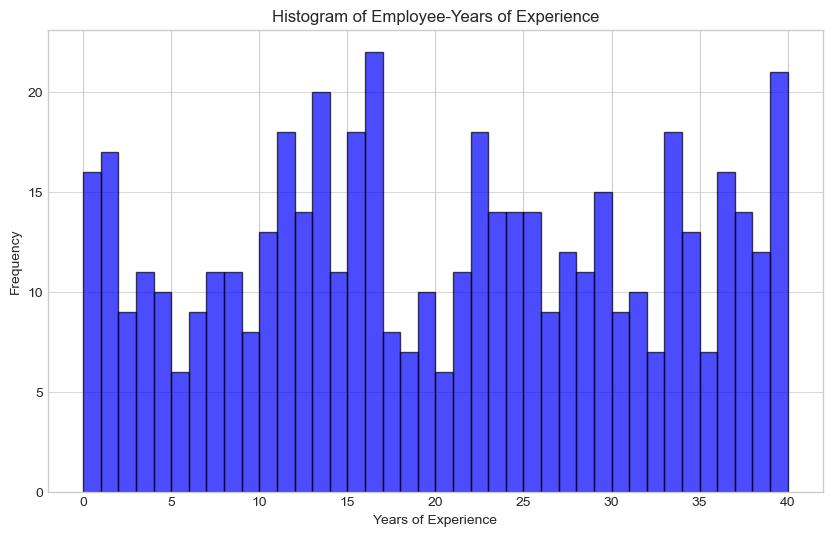

In [146]:
# Histgram of Years of Experience
plt.figure(figsize=(10, 6))
plt.hist(years_of_experience, bins=40, color='blue', alpha=0.7, edgecolor='black')  
plt.title('Histogram of Employee-Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add gridlines
plt.show()

 3. Calculate the number of employees per department and visualize the results using a bar chart for the generated
 data.

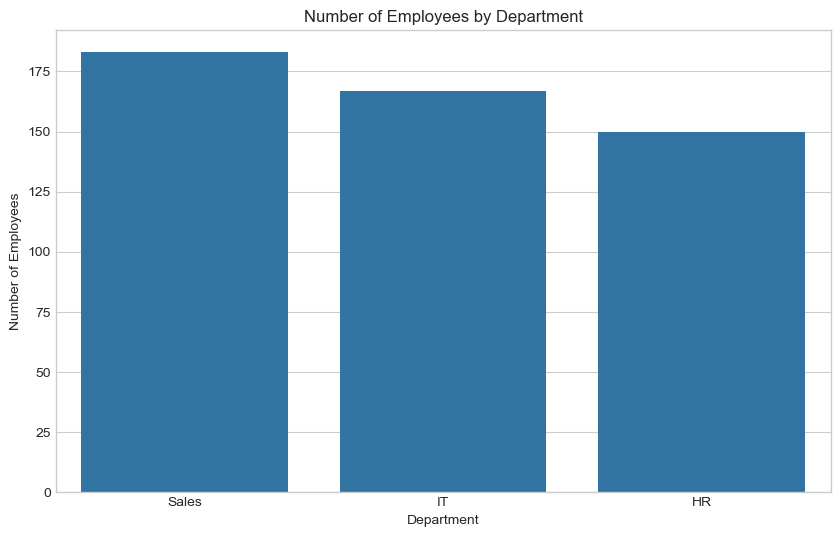

Sales: 183
IT: 167
HR: 150


In [164]:
import collections
# Bar chart of department
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_data, x='Department', order=employee_data['Department'].value_counts().index)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

sales_count = collections.Counter(departments).get('Sales')
IT_count = collections.Counter(departments).get('IT')
HR_count = collections.Counter(departments).get('HR')
print(f'Sales: {sales_count}')
print(f'IT: {IT_count}')
print(f'HR: {HR_count}')


 4. Attention[1] is a classic and popular technique in natural language processing. Given two vectors Q ∈ R5×10
 and K∈R5×10, the attention score of Q and K are calculated as:
 Attention Score(Q,K) = softmax(QKT√dk),
 where dk is the hidden dimension (10 in this case).
 Please randomly initialize Q and K vectors and visualize the attention score via heatmap.

 Reference [1] Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., & Polosukhin, I. (2017).
 Attention is all you need. Advances in neural information processing systems

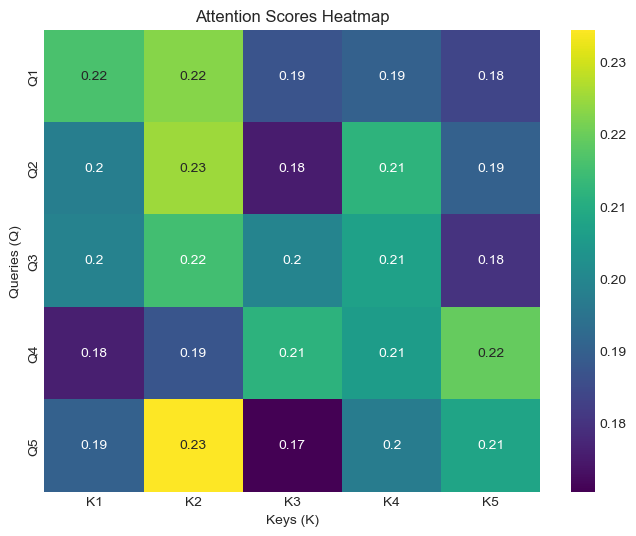

In [170]:
# define softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))  # Subtract max for numerical stability
    return e_x / e_x.sum(axis=-1, keepdims=True)

def calculate_attention(Q, K):
    """
    Calculate the attention scores.

    Parameters:
    Q: Query matrix (shape: [num_queries, d_k])
    K: Key matrix (shape: [num_keys, d_k])

    Returns:
    Attention scores (shape: [num_queries, num_keys])
    """
    d_k = K.shape[-1]  # Dimension of the key
    scores = np.dot(Q, K.T) / np.sqrt(d_k)  # Calculate the dot product and scale
    attention_score = softmax(scores)  # Apply softmax to get the attention weights
    return attention_score

# Randomly initialize Q and K
Q = np.random.rand(5, 10)  # Query matrix (5 queries, 10 dimensions)
K = np.random.rand(5, 10)  # Key matrix (5 keys, 10 dimensions)

# Calculate attention scores
attention_scores = calculate_attention(Q, K)

# Visualize the attention scores using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(attention_scores, annot=True, cmap='viridis', cbar=True, xticklabels=[f'K{i+1}' for i in range(K.shape[0])], yticklabels=[f'Q{i+1}' for i in range(Q.shape[0])])
plt.title('Attention Scores Heatmap')
plt.xlabel('Keys (K)')
plt.ylabel('Queries (Q)')
plt.show()